In [32]:
import sys
import math
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")

from core import *

In [4]:
test_data = TestData()

all_data = test_data.data
x_all_data = [i for i in range(len(all_data))]
y_all_data = [values[1][0] for values in all_data]

## Gasnące Świeczki

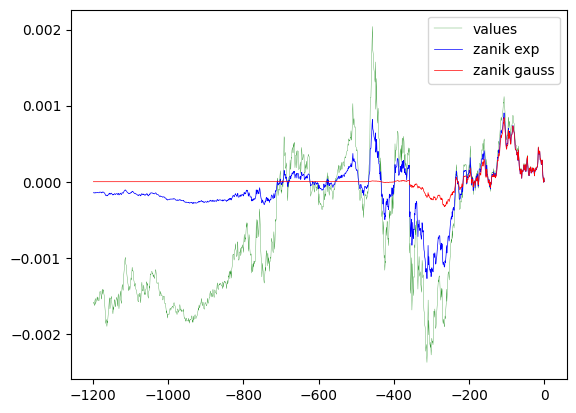

In [35]:
limits = (0,1200)
shift = 0
data = all_data[limits[0] + shift: limits[1] + shift]

minute_count = [i + shift for i in range(len(data))]
value = [values[1][0] for values in data]
value = [value_ - value[-1] for value_ in value] # poziom '0' od ostatniej świeczki
minute_count = [minute_count_ - minute_count[-1] for minute_count_ in minute_count] # czas liczony od istatniej świeczki

SKALA_ZANIKU_EXP = 500.0
def exp(t):
    return math.exp(-math.fabs(t/SKALA_ZANIKU_EXP))

SKALA_ZANIKU_GAUSS = 200.0
def gauss(t):
    return math.exp(-(t/SKALA_ZANIKU_GAUSS) ** 2)

zanik_exp = [value[i] * exp(minute_count[i]) for i in range(len(minute_count))]
zanik_gauss = [value[i] * gauss(minute_count[i]) for i in range(len(minute_count))]

plt.plot(minute_count, value, label='values', color='green', linewidth=0.2)
plt.plot(minute_count, zanik_exp, label='zanik exp', color='blue', linewidth=0.5)
plt.plot(minute_count, zanik_gauss, label='zanik gauss', color='red', linewidth=0.5)
plt.legend()
plt.show()


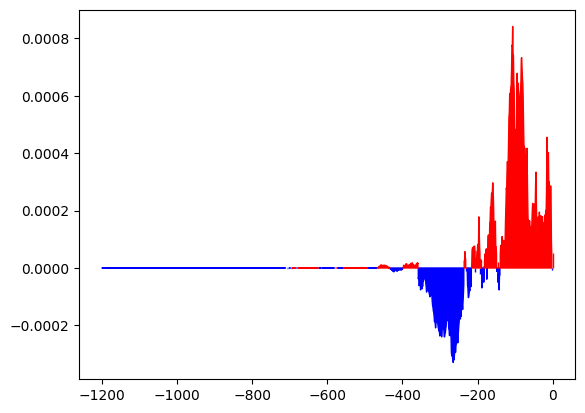

In [38]:
minute_count = np.array(minute_count, dtype='float64')
zanik_gauss = np.array(zanik_gauss)

plt.plot(minute_count, zanik_gauss, color='black', linewidth=0.0)
plt.fill_between(minute_count, zanik_gauss, where=((zanik_gauss < 0)), color='blue')
plt.fill_between(minute_count, zanik_gauss, where=((zanik_gauss > 0)), color='red')

plt.show()